# Homework I

Diogo Correia (ist199211) & Tomás Esteves (ist199341)

## I. Pen and Paper [12v]

**Given the following decision tree learnt from 20 observation using Shannon entropy, with leaf annotations (`#correct/#total`)**

![Decision Tree](./decision_tree.png)

### 1) [4v] Draw the training confusion matrix

<table>
  <tr>
    <td colspan="2" rowspan="2" style="border-top: none; border-left: none;"></td>
    <th colspan="2">True</th>
    <td rowspan="2" style="border-top: none; border-right: none;"></td>
  </tr>
  <tr>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <th rowspan="2">Predicted</th>
    <th>Positive</th>
    <td>8</td>
    <td>4</td>
    <td>12</td>
  </tr>
  <tr>
    <th>Negative</th>
    <td>3</td>
    <td>5</td>
    <td>8</td>
  </tr>
  <tr>
    <th colspan="2" style="border-left: none; border-bottom: none;"></th>
    <td>11</td>
    <td>9</td>
    <td>13</td>
  </tr>
</table>

### 2) [3v] Identify the training F1 after a post-pruning of the given tree under a maximum depth of 1.

<table>
  <tr>
    <td colspan="2" rowspan="2" style="border-top: none; border-left: none;"></td>
    <th colspan="2">True</th>
    <td rowspan="2" style="border-top: none; border-right: none;"></td>
  </tr>
  <tr>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <th rowspan="2">Predicted</th>
    <th>Positive</th>
    <td>5</td>
    <td>2</td>
    <td>7</td>
  </tr>
  <tr>
    <th>Negative</th>
    <td>6</td>
    <td>7</td>
    <td>13</td>
  </tr>
  <tr>
    <th colspan="2" style="border-left: none; border-bottom: none;"></th>
    <td>11</td>
    <td>9</td>
    <td>12</td>
  </tr>
</table>

In [315]:
TP = 5
FP = 2
FN = 6

P = TP / (TP + FP)
R = TP / (TP + FN)

F = (1 / 2 * (1 / P + 1 / R)) ** (-1)

F

0.5555555555555556

### 3) [2v] Identify two different reasons as to why the left tree path was not further decomposed.

1) To avoid overfitting (?)
2) Se A tiver correspondência direta em ser positivo (?)
3) IG desse branch ser muito pequeno (?)
4) Número de folhas limitado a 3 (?)
5) How can you correct bias towards the dominant class? To mitigate decision trees’ bias towards predicting the dominant class, make sure to adjust class imbalance before fitting your model. There are three approaches for tackling class imbalance in the preprocessing stage (or data cleaning stage) https://www.keboola.com/blog/decision-trees-machine-learning

### 4) [3v] Compute the information gain of variable y1

In [316]:
from math import log2

pos_ratio = 11 / 20

neg_ratio = 9 / 20

A_ratio = 7 / 20

B_ratio = 13 / 20

A_Positive_Ratio = 5 / 7

A_Negative_Ratio = 2 / 7

B_Positive_Ratio = 6 / 13

B_Negative_Ratio = 7 / 13

E_y_out = - pos_ratio * log2(pos_ratio) - neg_ratio * log2(neg_ratio)

E_y_out_y1 = A_ratio * (
    - A_Positive_Ratio * log2(A_Positive_Ratio)
    - A_Negative_Ratio * log2(A_Negative_Ratio)
) + B_ratio * (
    - B_Positive_Ratio * log2(B_Positive_Ratio)
    - B_Negative_Ratio * log2(B_Negative_Ratio)
)

IG = E_y_out - E_y_out_y1

IG


0.043459411134285864

## Programming [8v]

**Considering the `pd_speech.arff` dataset available at the homework tab:**

### 1) [6v]

**Using sklearn, apply a stratified 70-30 training-testing split with a fixed seed
(`random_state=1`), and assess in a single plot the training and testing accuracies of a decision tree
with no depth limits (and remaining default behavior) for a varying number of selected features
in `{5,10,40,100,250,700}`. Feature selection should be performed before decision tree learning
considering the discriminative power of the input variables according to mutual information
criterion (mutual_info_classif).**

In [317]:
from operator import itemgetter
import pandas as pd
from scipy.io.arff import loadarff
from sklearn import feature_selection, model_selection, tree, metrics, preprocessing
import numpy as np

In [318]:
# Reading the ARFF file
data = loadarff("data/pd_speech.arff")
df = pd.DataFrame(data[0])
df["class"] = df["class"].str.decode("utf-8")

In [319]:
X = df.drop("class", axis=1)
y = df["class"]

In [320]:
mutualInfoClassif = feature_selection.mutual_info_classif(X, y, random_state=1)

In [321]:
df_ig = pd.DataFrame(mutualInfoClassif, columns={"values"})
df_ig.index = X.columns
df_ig = df_ig.sort_values(by=["values"], ascending=False)

In [322]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size=0.7, stratify=y, random_state=1
)

In [323]:
NUM_FEATURES = [5, 10, 40, 100, 250, 700]

training_accurancy = []
test_accurancy = []

for num_features in NUM_FEATURES:

    df_ig_cut = df_ig[:num_features]
    X_train_cut = X_train[df_ig_cut.index]
    X_test_cut = X_test[df_ig_cut.index]

    predictor = tree.DecisionTreeClassifier()
    predictor.fit(X_train_cut, y_train)

    y_train_pred = predictor.predict(X_train_cut)
    y_test_pred = predictor.predict(X_test_cut)

    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    test_acc = metrics.accuracy_score(y_test, y_test_pred)

    training_accurancy.append(train_acc)
    test_accurancy.append(test_acc)

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

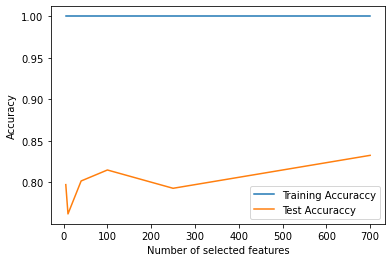

In [325]:
plt.plot(NUM_FEATURES, training_accurancy, label="Training Accuraccy")
plt.plot(NUM_FEATURES, test_accurancy, label="Test Accuraccy")

plt.xlabel("Number of selected features")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

### 2) [2v]

**Why training accuracy is persistently 1? Critically analyze the gathered results.**

Pelos resultados observados podemos notar que a training accuraccy é de 1.
Isto deve-se à forma de como as decisions trees aprendem.
Dado que o enunciado indica que a a árvore não tem limite de profundidade, para cada dado de treino inserido será criado uma nova folha na árvore, que tem como "caminho" os seus valores de input.
Assim depois da árvore estar treinada, se lhe dermos os mesmos inputs (de treino) para testar a sua accuraccy, esta já sabe o "caminho" a fazer e sabe classificar corretamente os valores. Isto leva a que tenha uma accuraccy de 1. No entanto ao ser lhe dada uma amostra para qual não foi treinada (de teste), observa-se que a accuraccy diminui para os 0.8. Isto porque não tem os tais caminhos criados que lhe permitem saber exatamente o valor.